https://www.the905guy.ca/article/how-to-create-a-relative-momentum-trading-strategy-in-python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
my_df = pd.read_csv('mf_testing_data.csv')

In [4]:
my_df['Date'] = pd.to_datetime(my_df['Date'], dayfirst=False)
my_df.set_index('Date', inplace=True)

In [5]:
mom_period = 126
rebal_freq = 22

In [6]:
my_df_pct = my_df.pct_change(mom_period)

In [7]:
my_df_pct['AAPL'].iloc[126]

0.26633165829145744

In [8]:
my_df_pct = my_df_pct[mom_period:]

In [9]:
my_df_ranks = pd.DataFrame(columns=my_df_pct.columns, index=my_df_pct.index)

In [10]:
for i in range(len(my_df_pct)):
    if i % rebal_freq == 0:
        my_df_ranks.iloc[i] = my_df_pct.iloc[i].rank(axis=0, ascending=False)

In [11]:
my_df_ranks = my_df_ranks.shift(periods=1, axis=0)

In [12]:
my_df_ranks.ffill(inplace=True)

In [14]:
num_long = 3
num_short = 3
num_stocks = my_df_ranks.shape[1] - num_short + 1

In [15]:
for col in my_df_ranks.columns:
    
    # if a stock has a rank in the top num_long values, we go long
    my_df_ranks.loc[my_df_ranks[col] <= num_long, col] = 1
    
    # if a stock has a rank in the bottom num_short values, we go short
    my_df_ranks.loc[my_df_ranks[col] >= num_stocks, col] = -1
    
    # if a stock doesn't have a ranking in top or bottom n values, we have no position
    my_df_ranks.loc[(my_df_ranks[col] < num_stocks) & (
        my_df_ranks[col] > num_long), col] = None

In [16]:
mult_df = (my_df.pct_change()) * my_df_ranks

In [17]:
mult_df['Total Return'] = (mult_df.sum(axis=1, skipna=True)) / (num_long + num_short)
mult_df = mult_df[mom_period:]

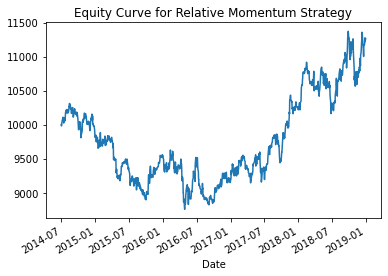

In [18]:
# Take the Daily Return of the strategy and compute the growth of strategy in $
mult_df['Portfolio Value'] = ((mult_df['Total Return'] + 1).cumprod()) * 10000

mult_df['Portfolio Value'].plot()
plt.title('Equity Curve for Relative Momentum Strategy')
plt.show()